In [18]:
!gdown 1C0aYI36oCDHSJCY3O69xV2QwycdJ2Rvl

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1C0aYI36oCDHSJCY3O69xV2QwycdJ2Rvl 



In [1]:
import numpy as np

Task: Build the Dataset object that load image and mask separately. The necessary functions are listed below.

In [2]:
from PIL import Image
img = Image.open('../cityscapes_data/val/1.jpg')

width, height = img.size

left_box = (0, 0, width // 2, height)
right_box = (width // 2, 0, width, height)

left_half = img.crop(left_box)
right_half = img.crop(right_box)

left_half.show()
right_half.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/agorski/snap/code/common/.cache/gio-modules/libgiolibproxy.so


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/agorski/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
Failed to register: GDBus.Error:org.freedesktop.DBus.Error.NoReply: Message recipient disconnected from message bus without replying


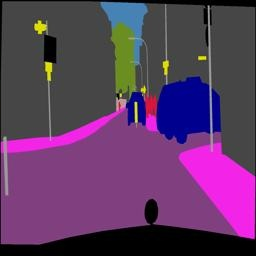

In [3]:
right_half

In [4]:
mapping_20 = {
        0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 8, 9: 1,
        10: 1, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 3, 18: 3, 19: 3,
        20: 3, 21: 4, 22: 4, 23: 5, 24: 6, 25: 6, 26: 7, 27: 7, 28: 7, 29: 7,
        30: 7, 31: 7, 32: 7, 33: 7, 34: 7
    }

In [5]:
from collections import namedtuple
Label = namedtuple( 'Label' , ['name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'])

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'ground'          , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'ground'          , 8       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'ground'          , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'ground'          , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),

    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),

    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , 34 ,       19 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),]


In [6]:
id2color = { label.id : np.asarray(label.color) for label in labels }

In [7]:
def find_closest_labels_vectorized(mask, mapping): # 'mapping' is a RGB color tuple to categorical number dictionary

    closest_distance = np.full([mask.shape[0], mask.shape[1]], 10000)
    closest_category = np.full([mask.shape[0], mask.shape[1]], None)

    for id, color in mapping.items(): # iterate over every color mapping
        dist = np.sqrt(np.linalg.norm(mask - color.reshape([1,1,-1]), axis=-1))
        is_closer = closest_distance > dist
        closest_distance = np.where(is_closer, dist, closest_distance)
        closest_category = np.where(is_closer, id, closest_category)

    return closest_category

In [8]:
import numpy as np
data=find_closest_labels_vectorized(np.array(right_half),id2color)
print(data.shape)

(256, 256)


In [9]:
np.unique(data)

array([0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 24, 26, 27, 28, 29, 30, 31, 33], dtype=object)

In [10]:
!unzip city_seg.zip -d seg_data

Archive:  city_seg.zip
replace seg_data/cityscapes_data/cityscapes_data/train/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


# Task 1 solution

In [11]:
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from glob import glob
import os
from PIL import Image
from tqdm import tqdm

/home/agorski/Desktop/projects/ENNCA-agorski/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
class ImageDataset(Dataset):
    mapping_20 = {
        0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 8, 9: 1,
        10: 1, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 3, 18: 3, 19: 3,
        20: 3, 21: 4, 22: 4, 23: 5, 24: 6, 25: 6, 26: 7, 27: 7, 28: 7, 29: 7,
        30: 7, 31: 7, 32: 7, 33: 7, 34: 7
    }

    Label = namedtuple( 'Label' , ['name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'])

    labels = [
        #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
        Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
        Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
        Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
        Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
        Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
        Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
        Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
        Label(  'road'                 ,  7 ,        0 , 'ground'          , 1       , False        , False        , (128, 64,128) ),
        Label(  'sidewalk'             ,  8 ,        1 , 'ground'          , 8       , False        , False        , (244, 35,232) ),
        Label(  'parking'              ,  9 ,      255 , 'ground'          , 1       , False        , True         , (250,170,160) ),
        Label(  'rail track'           , 10 ,      255 , 'ground'          , 1       , False        , True         , (230,150,140) ),
        Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
        Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),

        Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
        Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
        Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
        Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
        Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
        Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
        Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
        Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),

        Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
        Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
        Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
        Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
        Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
        Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
        Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
        Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
        Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
        Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
        Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
        Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
        Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
        Label(  'license plate'        , 34 ,       19 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),]
    
    id2color = { label.id : np.asarray(label.color) for label in labels }

    def __init__(self, path: str) -> None:
        super().__init__()
        images, masks = self.load_images(path)
        self.images = images
        self.masks = masks
    
    def __len__(self):
        return min(len(self.images), len(self.masks))
    
    def __getitem__(self, idx: int):
        return self.images[idx], self.masks[idx]

    @staticmethod
    def load_image_mask(path: str):
        img = Image.open(path)
        width, height = img.size

        left_box = (0, 0, width // 2, height)
        right_box = (width // 2, 0, width, height)

        image = img.crop(left_box)
        mask = img.crop(right_box)
        return image, mask
    
    @staticmethod
    def find_closest_labels_vectorized(mask, mapping): # 'mapping' is a RGB color tuple to categorical number dictionary
        closest_distance = np.full([mask.shape[0], mask.shape[1]], 10000)
        closest_category = np.full([mask.shape[0], mask.shape[1]], None)

        for id, color in mapping.items(): # iterate over every color mapping
            dist = np.sqrt(np.linalg.norm(mask - color.reshape([1,1,-1]), axis=-1))
            is_closer = closest_distance > dist
            closest_distance = np.where(is_closer, dist, closest_distance)
            closest_category = np.where(is_closer, id, closest_category)

        return closest_category

    def load_images(self, path: str):
        file_paths = sorted(glob(os.path.join(path, '*jpg')))[:100]
        image_masks = list(tqdm(map(lambda p: ImageDataset.load_image_mask(p), file_paths), total=len(file_paths)))
        images = list(map(lambda image_mask: np.array(image_mask[0]), image_masks))
        masks = list(map(lambda image_mask: np.array(image_mask[1]), image_masks))
        masks = list(tqdm(map(lambda m: self.find_closest_labels_vectorized(m, self.id2color), masks), total=len(masks)))

        print(masks[0].shape)

        return images, masks

        
train_path = "seg_data/cityscapes_data/train"
val_path = "seg_data/cityscapes_data/val"

train_ds = ImageDataset(train_path)
val_ds = ImageDataset(val_path)
# print(glob(os.path.join(train_path, "*.jpg")))

100%|██████████| 100/100 [00:11<00:00,  8.93it/s]


(256, 256)


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]

(256, 256)


In [13]:
BATCH_SIZE = 4

train_dl = DataLoader(train_ds, BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, BATCH_SIZE, shuffle=False)

Task2: Build FFNet UP-A, UP-B and UP-C separately. You need to forward some example data to make sure that the whole pipline works fine.

In [20]:
BN_MOMENTUM = 0.1
gpu_up_kwargs = {"mode": "bilinear", "align_corners": True}
mobile_up_kwargs = {"mode": "nearest"}
relu_inplace = True

In [15]:
class ConvBNReLU(nn.Module):
    def __init__(
        self,
        in_chan,
        out_chan,
        ks=3,
        stride=1,
        padding=1,
        activation=nn.ReLU,
        *args,
        **kwargs,
    ):
        super(ConvBNReLU, self).__init__()
        layers = [
            nn.Conv2d(
                in_chan,
                out_chan,
                kernel_size=ks,
                stride=stride,
                padding=padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_chan, momentum=BN_MOMENTUM),
        ]
        if activation:
            layers.append(activation(inplace=relu_inplace))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)


In [16]:
class AdapterConv(nn.Module):
    def __init__(
        self, in_channels=[256, 512, 1024, 2048], out_channels=[64, 128, 256, 512]
    ):
        super(AdapterConv, self).__init__()
        assert len(in_channels) == len(
            out_channels
        ), "Number of input and output branches should match"
        self.adapter_conv = nn.ModuleList()

        for k in range(len(in_channels)):
            self.adapter_conv.append(
                ConvBNReLU(in_channels[k], out_channels[k], ks=1, stride=1, padding=0),
            )

    def forward(self, x):
        out = []
        for k in range(len(self.adapter_conv)):
            out.append(self.adapter_conv[k](x[k]))
        return out

In [17]:
class UpsampleCat(nn.Module):
    def __init__(self, upsample_kwargs=gpu_up_kwargs):
        super(UpsampleCat, self).__init__()
        self._up_kwargs = upsample_kwargs

    def forward(self, x):
        """Upsample and concatenate feature maps."""
        assert isinstance(x, list) or isinstance(x, tuple)
        # print(self._up_kwargs)
        x0 = x[0]
        _, _, H, W = x0.size()
        for i in range(1, len(x)):
            x0 = torch.cat([x0, F.interpolate(x[i], (H, W), **self._up_kwargs)], dim=1)
        return x0

In [18]:
class UpBranch(nn.Module):
    def __init__(
        self,
        in_channels=[64, 128, 256, 512],
        out_channels=[128, 128, 128, 128],
        upsample_kwargs=gpu_up_kwargs,
    ):
        super(UpBranch, self).__init__()

        self._up_kwargs = upsample_kwargs

        self.fam_32_sm = ConvBNReLU(
            in_channels[3], out_channels[3], ks=3, stride=1, padding=1
        )
        self.fam_32_up = ConvBNReLU(
            in_channels[3], in_channels[2], ks=1, stride=1, padding=0
        )
        self.fam_16_sm = ConvBNReLU(
            in_channels[2], out_channels[2], ks=3, stride=1, padding=1
        )
        self.fam_16_up = ConvBNReLU(
            in_channels[2], in_channels[1], ks=1, stride=1, padding=0
        )
        self.fam_8_sm = ConvBNReLU(
            in_channels[1], out_channels[1], ks=3, stride=1, padding=1
        )
        self.fam_8_up = ConvBNReLU(
            in_channels[1], in_channels[0], ks=1, stride=1, padding=0
        )
        self.fam_4 = ConvBNReLU(
            in_channels[0], out_channels[0], ks=3, stride=1, padding=1
        )

        self.high_level_ch = sum(out_channels)
        self.out_channels = out_channels

    def forward(self, x):

        feat4, feat8, feat16, feat32 = x

        smfeat_32 = self.fam_32_sm(feat32)
        upfeat_32 = self.fam_32_up(feat32)

        _, _, H, W = feat16.size()
        x = F.interpolate(upfeat_32, (H, W), **self._up_kwargs) + feat16
        smfeat_16 = self.fam_16_sm(x)
        upfeat_16 = self.fam_16_up(x)

        _, _, H, W = feat8.size()
        x = F.interpolate(upfeat_16, (H, W), **self._up_kwargs) + feat8
        smfeat_8 = self.fam_8_sm(x)
        upfeat_8 = self.fam_8_up(x)

        _, _, H, W = feat4.size()
        smfeat_4 = self.fam_4(
            F.interpolate(upfeat_8, (H, W), **self._up_kwargs) + feat4
        )

        return smfeat_4, smfeat_8, smfeat_16, smfeat_32

In [19]:
class UpBranch_Inverted(nn.Module):
    def __init__(
        self,
        in_channels=[64, 128, 256, 512],
        out_channels=[128, 128, 128, 128],
        upsample_kwargs=gpu_up_kwargs,
    ):
        super(UpBranch, self).__init__()

        self._up_kwargs = upsample_kwargs

        self.fam_32_sm = ConvBNReLU(
            in_channels[3], out_channels[3], ks=3, stride=1, padding=1
        )
        self.fam_32_up = ConvBNReLU(
            in_channels[3], in_channels[2], ks=1, stride=1, padding=0
        )
        self.fam_16_sm = ConvBNReLU(
            in_channels[2], out_channels[2], ks=3, stride=1, padding=1
        )
        self.fam_16_up = ConvBNReLU(
            in_channels[2], in_channels[1], ks=1, stride=1, padding=0
        )
        self.fam_8_sm = ConvBNReLU(
            in_channels[1], out_channels[1], ks=3, stride=1, padding=1
        )
        self.fam_8_up = ConvBNReLU(
            in_channels[1], in_channels[0], ks=1, stride=1, padding=0
        )
        self.fam_4 = ConvBNReLU(
            in_channels[0], out_channels[0], ks=3, stride=1, padding=1
        )

        self.high_level_ch = sum(out_channels)
        self.out_channels = out_channels

    def forward(self, x):

        feat4, feat8, feat16, feat32 = x

        smfeat_32 = self.fam_32_sm(feat32)
        upfeat_32 = self.fam_32_up(feat32)

        _, _, H, W = feat16.size()
        x = F.interpolate(upfeat_32, (H, W), **self._up_kwargs) + feat16
        smfeat_16 = self.fam_16_sm(x)
        upfeat_16 = self.fam_16_up(x)

        _, _, H, W = feat8.size()
        x = F.interpolate(upfeat_16, (H, W), **self._up_kwargs) + feat8
        smfeat_8 = self.fam_8_sm(x)
        upfeat_8 = self.fam_8_up(x)

        _, _, H, W = feat4.size()
        smfeat_4 = self.fam_4(
            F.interpolate(upfeat_8, (H, W), **self._up_kwargs) + feat4
        )

        return smfeat_4, smfeat_8, smfeat_16, smfeat_32


In [67]:
class UpsampleCat(nn.Module):
    def __init__(self, upsample_kwargs=gpu_up_kwargs):
        super(UpsampleCat, self).__init__()
        self._up_kwargs = upsample_kwargs

    def forward(self, x):
        """Upsample and concatenate feature maps."""
        assert isinstance(x, list) or isinstance(x, tuple)
        # print(self._up_kwargs)
        x0 = x[0]
        _, _, H, W = x0.size()
        for i in range(1, len(x)):
            x0 = torch.cat([x0, F.interpolate(x[i], (H, W), **self._up_kwargs)], dim=1)
        return x0

# Task solution

In [49]:
# based on https://github.com/Qualcomm-AI-research/FFNet/blob/master/models/ffnet_blocks.py
base_chans = [64, 128, 256, 512]
in_chans = [64, 128, 256, 512]

up_A = UpBranch(in_chans, upsample_kwargs=mobile_up_kwargs)
up_B = UpBranch(in_chans, [96, 96, 64, 32])
up_C = UpBranch(in_chans, [128, 16, 16, 16])

f1 = torch.randn(size=(4,64,8,8))
f2 = torch.randn(size=(4,128,8,8))
f3 = torch.randn(size=(4,256,8,8))
f4 = torch.randn(size=(4,512,8,8))

input_features = [f1, f2, f3, f4]


output_up_A = up_A.forward(input_features)
output_up_B = up_B.forward(input_features)
output_up_C = up_C.forward(input_features)

print("A shapes")
for x in output_up_A:
    print(x.shape)

print("B shapes")
for x in output_up_A:
    print(x.shape)

print("C shapes")
for x in output_up_C:
    print(x.shape)

A shapes
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
B shapes
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
C shapes
torch.Size([4, 128, 8, 8])
torch.Size([4, 16, 8, 8])
torch.Size([4, 16, 8, 8])
torch.Size([4, 16, 8, 8])


Task: replace convolution units in FFN with InvertedResidual block.

In [50]:
class InvertedResidual(nn.Module):
    def __init__(self, inp, oup, stride, expand_ratio):
        super(InvertedResidual, self).__init__()
        assert stride in [1, 2]

        hidden_dim = round(inp * expand_ratio)
        self.identity = stride == 1 and inp == oup

        if expand_ratio == 1:
            self.conv = nn.Sequential(
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )
        else:
            self.conv = nn.Sequential(
                # pw
                nn.Conv2d(inp, hidden_dim, 1, 1, 0, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )

    def forward(self, x):
        if self.identity:
            return x + self.conv(x)
        else:
            return self.conv(x)

# Task solution

In [51]:
class UpBranch_Inverted(nn.Module):
    def __init__(
        self,
        in_channels=[64, 128, 256, 512],
        out_channels=[128, 128, 128, 128],
        upsample_kwargs=gpu_up_kwargs,
    ):
        super(UpBranch_Inverted, self).__init__()

        self._up_kwargs = upsample_kwargs

        self.fam_32_sm = InvertedResidual(
            in_channels[3], out_channels[3], stride=1, expand_ratio=1
        )
        self.fam_32_up = InvertedResidual(
            in_channels[3], in_channels[2], stride=1, expand_ratio=1
        )
        self.fam_16_sm = InvertedResidual(
            in_channels[2], out_channels[2], stride=1, expand_ratio=1
        )
        self.fam_16_up = InvertedResidual(
            in_channels[2], in_channels[1], stride=1, expand_ratio=1
        )
        self.fam_8_sm = InvertedResidual(
            in_channels[1], out_channels[1], stride=1, expand_ratio=1
        )
        self.fam_8_up = InvertedResidual(
            in_channels[1], in_channels[0], stride=1, expand_ratio=1
        )
        self.fam_4 = InvertedResidual(
            in_channels[0], out_channels[0], stride=1, expand_ratio=11
        )

        self.high_level_ch = sum(out_channels)
        self.out_channels = out_channels

    def forward(self, x):

        feat4, feat8, feat16, feat32 = x

        smfeat_32 = self.fam_32_sm(feat32)
        upfeat_32 = self.fam_32_up(feat32)

        _, _, H, W = feat16.size()
        x = F.interpolate(upfeat_32, (H, W), **self._up_kwargs) + feat16
        smfeat_16 = self.fam_16_sm(x)
        upfeat_16 = self.fam_16_up(x)

        _, _, H, W = feat8.size()
        x = F.interpolate(upfeat_16, (H, W), **self._up_kwargs) + feat8
        smfeat_8 = self.fam_8_sm(x)
        upfeat_8 = self.fam_8_up(x)

        _, _, H, W = feat4.size()
        smfeat_4 = self.fam_4(
            F.interpolate(upfeat_8, (H, W), **self._up_kwargs) + feat4
        )

        return smfeat_4, smfeat_8, smfeat_16, smfeat_32


In [52]:
# based on https://github.com/Qualcomm-AI-research/FFNet/blob/master/models/ffnet_blocks.py
base_chans = [64, 128, 256, 512]
in_chans = [64, 128, 256, 512]

up_A = UpBranch_Inverted(in_chans, upsample_kwargs=mobile_up_kwargs)
up_B = UpBranch_Inverted(in_chans, [96, 96, 64, 32])
up_C = UpBranch_Inverted(in_chans, [128, 16, 16, 16])

f1 = torch.randn(size=(4,64,8,8))
f2 = torch.randn(size=(4,128,8,8))
f3 = torch.randn(size=(4,256,8,8))
f4 = torch.randn(size=(4,512,8,8))

input_features = [f1, f2, f3, f4]


output_up_A = up_A.forward(input_features)
output_up_B = up_B.forward(input_features)
output_up_C = up_C.forward(input_features)

print("A shapes")
for x in output_up_A:
    print(x.shape)

print("B shapes")
for x in output_up_A:
    print(x.shape)

print("C shapes")
for x in output_up_C:
    print(x.shape)

A shapes
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
B shapes
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
torch.Size([4, 128, 8, 8])
C shapes
torch.Size([4, 128, 8, 8])
torch.Size([4, 16, 8, 8])
torch.Size([4, 16, 8, 8])
torch.Size([4, 16, 8, 8])
